## Assignment 8
#### Instructions: Revisit assignment 2 and finish the tasks using pandas and geopandas, instead.

The tasks are:

- Find top n most common county names (n = 3 or 5, for example)
- Derive summary statistics for states, for example, number of counties, counties with max/min area
- Join fips code to get full names of states (plesae do a real join using merge)
- Plot maps to show all the counties with the most common names from first task



In [205]:
#imports
import fiona
import geopandas as gpd
import pandas as pd

In [112]:
#adding geojson data from a link
url = "https://raw.githubusercontent.com/TangoYankee/gtech_731-geocomp-hw/main/assignment-eight/data/gz_2010_us_050_00_20m.geojson"
data = gpd.read_file(url)


In [20]:
#making sure the dataframe looks right
data.head(5)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."


#### Task 1:  Find top n most common county names (n = 3 or 5, for example)

In [362]:
#for loop for finding common names
common_names_dict = {}

for name in nameList:
    if name in common_names_dict:
      common_names_dict[name] +=1
    else:
      common_names_dict[name] =1


In [291]:
#Turning common names dictionary into dataframe using pandas
new_common_names = pd.DataFrame.from_dict(common_names_dict, orient = 'index')

#Sort
sorted_common_names = new_common_names.sort_values(0)

In [304]:
#Answer
most_common_names = sorted_common_names.tail(5)
most_common_names

,0
Jackson,23
Lincoln,23
Franklin,24
Jefferson,25
Washington,28


#### TASK 2: Derive summary statistics for states, for example, number of counties, counties with max/min area

In [174]:
#Census area summary statistics
data.describe()

,CENSUSAREA
count,3221.000000
mean,1097.587458
std,3571.272013
min,1.999000
25%,418.922000
50%,604.360000
75%,914.523000
max,145504.789000


In [185]:
#Getting the max area for each state
max_data = data
max_data.groupby("STATE").max()

C:\Users\amyca\AppData\Local\Temp\ipykernel_72708\208025681.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_data.groupby("STATE").max()


,GEO_ID,COUNTY,NAME,LSAD,CENSUSAREA
STATE,,,,,
01,0500000US01133,133,Winston,County,1589.784
02,0500000US02290,290,Yukon-Koyukuk,Muny,145504.789
04,0500000US04027,027,Yuma,County,18618.885
05,0500000US05149,149,Yell,County,1039.214
06,0500000US06115,115,Yuba,County,20056.938
08,0500000US08125,125,Yuma,County,4772.672
09,0500000US09015,015,Windham,County,920.560
10,0500000US10005,005,Sussex,County,936.079
11,0500000US11001,001,District of Columbia,,61.048


In [187]:
#Getting min area for each state
min_data = data
max_data.groupby("STATE").min()

C:\Users\amyca\AppData\Local\Temp\ipykernel_72708\3577323514.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  max_data.groupby("STATE").min()


,GEO_ID,COUNTY,NAME,LSAD,CENSUSAREA
STATE,,,,,
01,0500000US01001,001,Autauga,County,534.991
02,0500000US02013,013,Aleutians East,Borough,452.325
04,0500000US04001,001,Apache,County,1236.916
05,0500000US05001,001,Arkansas,County,528.268
06,0500000US06001,001,Alameda,County,46.873
08,0500000US08001,001,Adams,County,33.034
09,0500000US09001,001,Fairfield,County,369.301
10,0500000US10001,001,Kent,County,426.286
11,0500000US11001,001,District of Columbia,,61.048


In [204]:
#number of counties (look at "Length: 3221" at the bottom of the output)
unique_counties = data.NAME.unique
unique_counties

<bound method Series.unique of 0            Autauga
1             Blount
2           Chambers
3            Chilton
4            Colbert
            ...     
3216        Accomack
3217           Bland
3218        Buchanan
3219       Charlotte
3220    Chesterfield
Name: NAME, Length: 3221, dtype: object>

#### TASK 3: Join fips code to get full names of states (plesae do a real join using merge)

In [275]:
#add json file
file = "stateCodeToFips.json"
state_fips = pd.read_json(file, orient='index')
state_fips.sort_index()


,0
AK,2
AL,1
AR,5
AS,60
AZ,4
CA,6
CO,8
CT,9
DC,11
DE,10


In [276]:
#state_fips: making sure STATE column is an interger so it can be later merged
state_fips.columns=['STATE']
state_fips['STATE'] = state_fips['STATE'].astype(int)
state_fips.head()

,STATE
AK,2
AL,1
AR,5
AS,60
AZ,4


In [288]:
#adding index as a column name
state_fips_reset = state_fips.reset_index()
state_fips_reset.head(5)

,index,STATE
0,AK,2
1,AL,1
2,AR,5
3,AS,60
4,AZ,4


In [287]:
#merge_data: making sure STATE column is an interger so it can be later merged
merge_data = data
merge_data['STATE'] = merge_data['STATE'].astype(int)

In [286]:
#ANSWER
merged_data = merge_data.merge(state_fips_reset, on='STATE')
merged_data.sample(5)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,index
565,0500000US16029,16,029,Caribou,County,1764.146,"POLYGON ((-111.04416 43.02005, -111.04413 43.0...",ID
2837,0500000US51091,51,091,Highland,County,415.156,"POLYGON ((-79.79457 38.26486, -79.79013 38.267...",VA
2879,0500000US51610,51,610,Falls Church,city,1.999,"POLYGON ((-77.15029 38.87619, -77.15497 38.872...",VA
1913,0500000US37161,37,161,Rutherford,County,564.151,"POLYGON ((-81.87443 35.18411, -81.96932 35.187...",NC
2071,0500000US40129,40,129,Roger Mills,County,1141.136,"POLYGON ((-100.00039 35.61912, -100.00040 35.8...",OK


#### TASK 4: Plot maps to show all the counties with the most common names from first task

<Axes: >

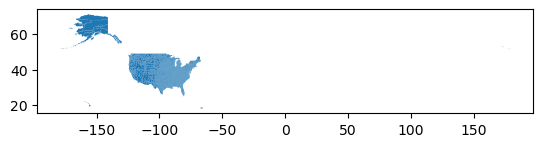

In [292]:
#mapping all the data
map_data = data
map_data.plot()

<Axes: >

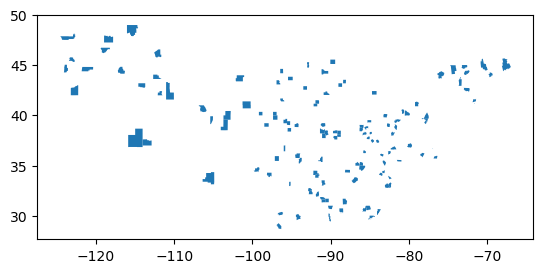

In [303]:
#plot by common names
map_data_plot = map_data.loc[map_data['NAME'].isin(["Jackson","Lincoln","Franklin","Jefferson","Washington"])]
map_data_plot.plot()

Extra work...adding basemap layers to create cool maps

In [338]:
us_states = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
boundaries = gpd.read_file(us_states)

<Axes: >

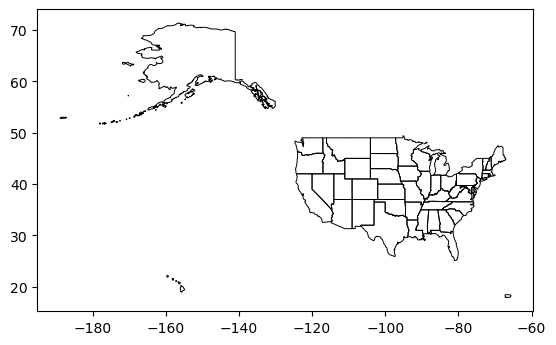

In [334]:
boundaries.plot(facecolor="none", 
              edgecolor='black', lw=0.7)

In [343]:
boundaries = boundaries.to_crs(map_data_plot.crs)

<Axes: >

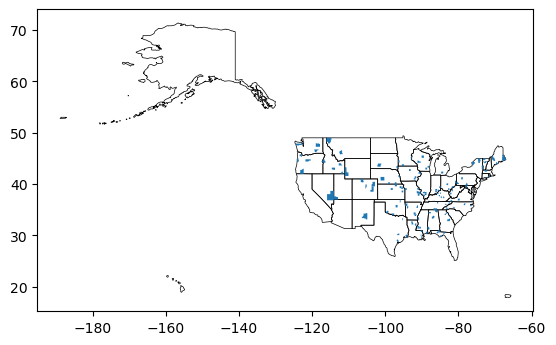

In [347]:
ax = map_data_plot.plot(zorder=2)

boundaries.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.5, zorder=1)

In [359]:
conda install contextily --channel conda-forge

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\amyca\anaconda3\envs\geo_env

  added / updated specs:
    - contextily


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    affine-2.4.0               |     pyhd8ed1ab_0          18 KB  conda-forge
    contextily-1.3.0           |     pyhd8ed1ab_0          19 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.3.0                |     pyhd8ed1ab_0          68 KB  conda-forge
    mercantile-1.2.1           |     pyhd8ed1ab_0          17 KB  conda-forge
    openssl-3.1.0              |       hcfcfb64_0         7.1 MB  conda-forge
    rasterio-1.3.6             |  py311hc06ee40_0         6.6 MB  conda-forge
    snuggs-1.4.7               |             py_0           8 KB  conda-forge
    ---------------------



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.0




In [360]:
%matplotlib inline

import contextily as cx
import geopandas
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

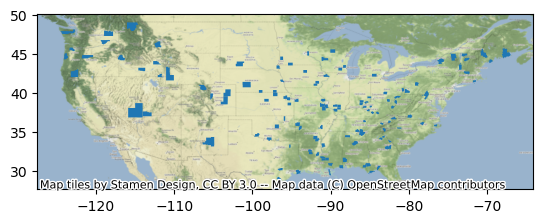

In [361]:
ax = map_data_plot.plot(zorder=2)
cx.add_basemap(ax, crs=map_data_plot.crs)